In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam
#from keras_visualizer import visualizer 
import tensorflow as tf
import pandas as pd

In [4]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

In [5]:
x_train = x_train/255
x_test = x_test/255

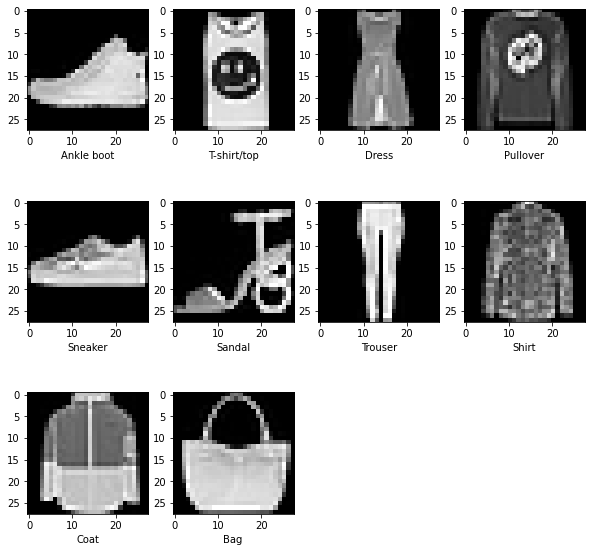

In [41]:
from collections import Counter
label_num = list(Counter(y_train).keys())
images = []
for i in label_num:
  for  ind in range(100,len(x_train)):
    if y_train[ind] == i:
      images.append(x_train[ind])
      break
label = {0 :	"T-shirt/top",
          1 :	"Trouser",
          2 :	"Pullover",
          3 :	"Dress",
          4 :	"Coat",
          5 :	"Sandal",
          6 :	"Shirt",
          7 :	"Sneaker",
          8 :	"Bag",
          9 :	"Ankle boot"}

plt.figure(figsize=(10,10))
for i in range(len(label_num)):
  plt.subplot(3,4,i+1)
  plt.imshow(images[i],cmap='gray')
  plt.xlabel(label[label_num[i]])

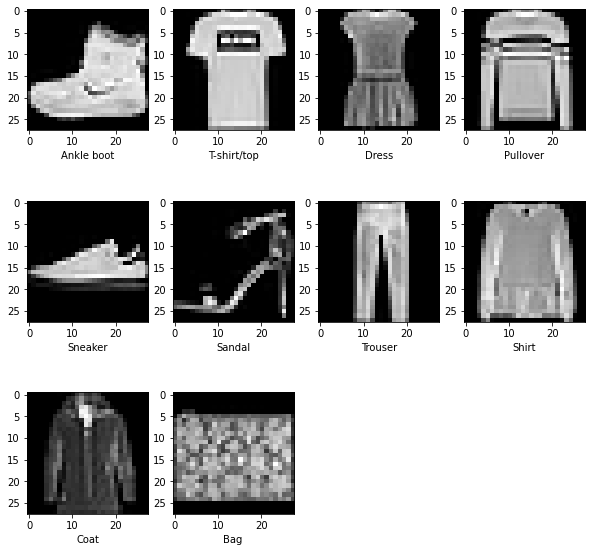

In [43]:
images =[]
for i in label_num:
  for  ind in range(len(x_train)):
    if y_train[ind] == i:
      images.append(x_train[ind])
      break
label = {0 :	"T-shirt/top",
          1 :	"Trouser",
          2 :	"Pullover",
          3 :	"Dress",
          4 :	"Coat",
          5 :	"Sandal",
          6 :	"Shirt",
          7 :	"Sneaker",
          8 :	"Bag",
          9 :	"Ankle boot"}

plt.figure(figsize=(10,10))
for i in range(len(label_num)):
  plt.subplot(3,4,i+1)
  plt.imshow(images[i],cmap='gray')
  plt.xlabel(label[label_num[i]])

## We can see there are different varieties of a particular product for the same label

In [6]:
model = Sequential()
model.add(Conv2D(512, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 512)       13312     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 512)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 512)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 512)       2359808   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 512)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 512)         0

In [8]:
checkpoint_filepath = '/tmp/checkpoint2'
check_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=13, 
                    validation_data=(x_test, y_test),callbacks=[check_callback], batch_size=128)

Epoch 1/13
469/469 [==============================] - 37s 51ms/step - loss: 0.4774 - accuracy: 0.8246 - val_loss: 0.3362 - val_accuracy: 0.8772
Epoch 2/13
469/469 [==============================] - 23s 49ms/step - loss: 0.2950 - accuracy: 0.8906 - val_loss: 0.2949 - val_accuracy: 0.8961
Epoch 3/13
469/469 [==============================] - 23s 50ms/step - loss: 0.2492 - accuracy: 0.9074 - val_loss: 0.2761 - val_accuracy: 0.8993
Epoch 4/13
469/469 [==============================] - 24s 50ms/step - loss: 0.2184 - accuracy: 0.9182 - val_loss: 0.2579 - val_accuracy: 0.9052
Epoch 5/13
469/469 [==============================] - 24s 51ms/step - loss: 0.1911 - accuracy: 0.9281 - val_loss: 0.2377 - val_accuracy: 0.9167
Epoch 6/13
469/469 [==============================] - 22s 48ms/step - loss: 0.1688 - accuracy: 0.9362 - val_loss: 0.2609 - val_accuracy: 0.9104
Epoch 7/13
469/469 [==============================] - 24s 50ms/step - loss: 0.1469 - accuracy: 0.9447 - val_loss: 0.2539 - val_accuracy:

In [10]:
best_model = tf.keras.models.load_model('/tmp/checkpoint2')

In [11]:
loss, accuracy = best_model.evaluate(x_test, (y_test))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.2707 - accuracy: 0.9219


 Loss 0.2706751525402069 Accuracy: 0.9218999743461609


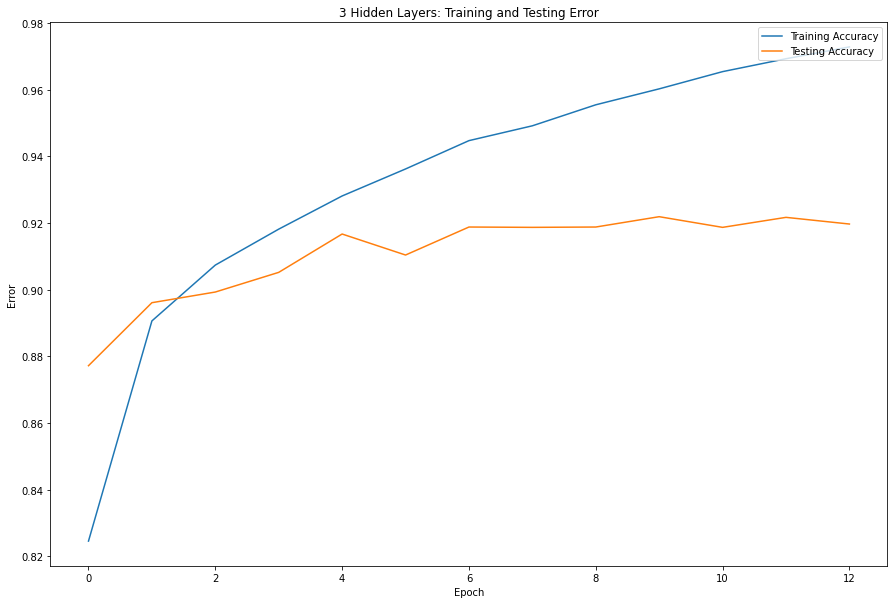

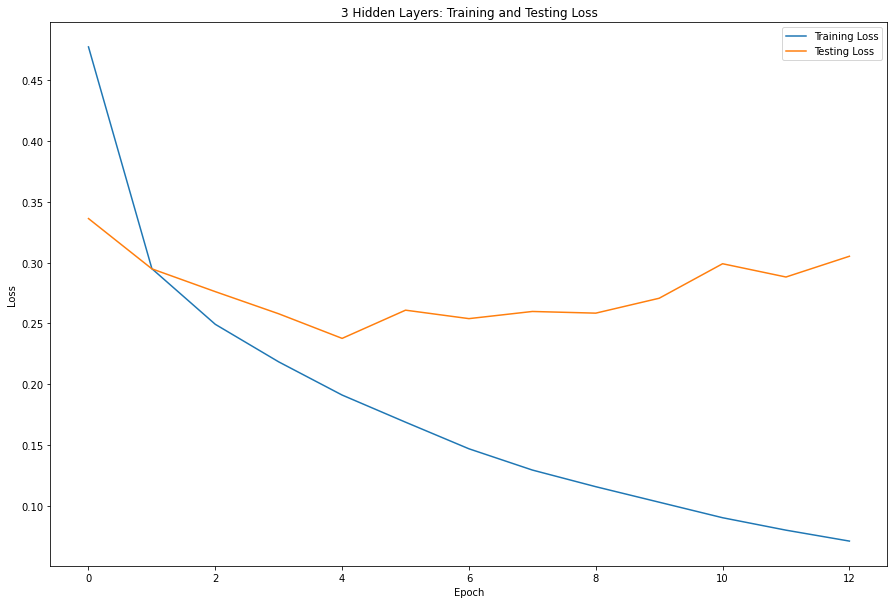

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('3 Hidden Layers: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('3 Hidden Layers: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

In [ ]:
!zip -r /content/model2.zip /tmp/checkpoint2

  adding: tmp/checkpoint2/ (stored 0%)
  adding: tmp/checkpoint2/keras_metadata.pb (deflated 91%)
  adding: tmp/checkpoint2/variables/ (stored 0%)
  adding: tmp/checkpoint2/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: tmp/checkpoint2/variables/variables.index (deflated 67%)
  adding: tmp/checkpoint2/assets/ (stored 0%)
  adding: tmp/checkpoint2/saved_model.pb (deflated 89%)


In [ ]:
from google.colab import files
files.download("/content/model2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
x_test.shape

(10000, 28, 28)